In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, precision_recall_curve

# 1. Регрессия

In [29]:
from sklearn.datasets import load_boston

data = load_boston()
X = data.data
y = data.target
z = data.feature_names
df = pd.DataFrame(np.c_[X,y], columns=list(z)+['target'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [44]:
RFR = RandomForestRegressor(random_state=42)
GBR = GradientBoostingRegressor(random_state=42)
ABR = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
RFR.fit(X_train, y_train)
GBR.fit(X_train, y_train)
ABR.fit(X_train, y_train)

y_pred_rfr = RFR.predict(X_test)
y_pred_gbr = GBR.predict(X_test)
y_pred_abr = ABR.predict(X_test)


print(f'r2 for Random Forest is {r2_score(y_test, y_pred_rfr)}')
print(f'r2 for GradientBoosting is {r2_score(y_test, y_pred_gbr)}')
print(f'r2 for AdaBoostRegression is {r2_score(y_test, y_pred_abr)}')



r2 for Random Forest is 0.8708997131330258
r2 for GradientBoosting is 0.8907929176394638
r2 for AdaBoostRegression is 0.8376118861177343


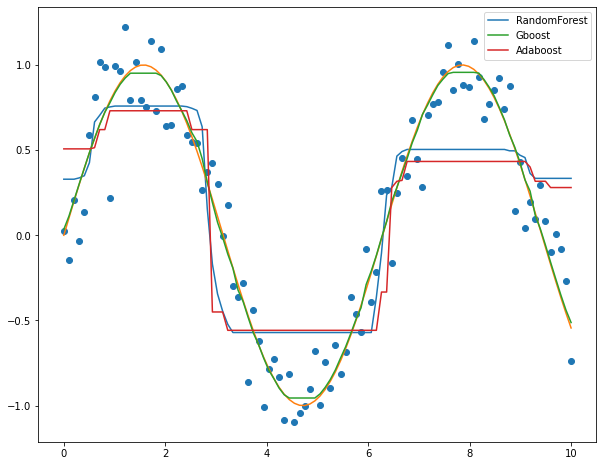

In [50]:
x = np.linspace(0,10,100)[:, np.newaxis]
y = np.sin(x)
y_noised = y + np.random.randn(100,1)*0.2

fig, ax = plt.subplots(figsize=(10,8))
plt.plot(x, RandomForestRegressor(max_depth=2,random_state=42).fit(x,y).predict(x), label='RandomForest')
plt.scatter(x,y_noised)
plt.plot(x,y)
plt.plot(x, GradientBoostingRegressor(max_depth=2,random_state=42).fit(x,y).predict(x), label='Gboost')
plt.plot(x, AdaBoostRegressor(DecisionTreeRegressor(max_depth=2),random_state=42).fit(x,y).predict(x), label='Adaboost')

plt.legend()

В RandomForest выбирают деревья максимальной глубины, в Gboost деревья минимальной глубины

# 2. Классификация

In [53]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)
X = data['data']
y = data['target']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RFC = RandomForestClassifier(random_state=42)
RFC.fit(X_train, y_train)
GBC = GradientBoostingClassifier(random_state=42)
GBC.fit(X_train, y_train)
y_pred1 = RFC.predict(X_test)
y_pred2 = GBC.predict(X_test)

print(f' RandomForest scores {accuracy_score(y_test, y_pred1), roc_auc_score(y_test, RFC.predict(X_test))}')
print(f' Gboos scores {accuracy_score(y_test, y_pred2), roc_auc_score(y_test, GBC.predict(X_test))}')

 RandomForest scores (0.9649122807017544, 0.9580740255486406)
 Gboos scores (0.956140350877193, 0.9510317720275139)


In [63]:
from sklearn.model_selection import cross_validate, KFold

In [85]:
print('Gboost :', cross_validate(GradientBoostingClassifier(random_state=42),
               X, y,
               cv=KFold(5, shuffle=True, random_state=242),
              scoring='roc_auc')['test_score'].mean())
print('RandomForest :', cross_validate(RandomForestClassifier(random_state=42),
               X, y,
               cv=KFold(5, shuffle=True, random_state=242),
              scoring='roc_auc')['test_score'].mean())

Gboost : 0.9905314732062905
RandomForest : 0.9891173816671991
